# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Ваш код здесь
adver_data.head(6)

,TV,Radio,Newspaper,Sales,Unnamed: 4
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [4]:
# Ваш код здесь
# Файл "неправильно" скачался - со сдвигом колонок, поютому вынужден исправить
adver_data.info 
adver_data = adver_data.rename(columns = {'TV':'Ind', 'Radio' : 'TV', 'Newspaper' : 'Radio', 'Sales':'Newspaper', 
                                          'Unnamed: 4':'Sales' })
adver_data.head(6)

,Ind,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = pd.DataFrame(adver_data, columns = ['TV', 'Radio', 'Newspaper'])# Ваш код здесь

y = pd.DataFrame(adver_data, columns = ['Sales']) # Ваш код здесь


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
# Ваш код здесь
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
print means
print stds
print 'X:  '
print X.head()
col = ['TV','Radio','Newspaper']
for i in range (3):
    X[col[i]] = (X[col[i]] - means[i])/stds[i]  
# Наверное три раза написать такую строчку было бы эффективнее,но в общем случае данный код компактнее
print '"New" X:   '
print X.head()


TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64
TV           85.639332
Radio        14.809646
Newspaper    21.724106
dtype: float64
X:  
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
"New" X:   
         TV     Radio  Newspaper
0  0.969852  0.981522   1.778945
1 -1.197376  1.082808   0.669579
2 -1.516155  1.528463   1.783549
3  0.052050  1.217855   1.286405
4  0.394182 -0.841614   1.281802


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [7]:
import numpy as np
# print X.head() 
a = X.shape
b = np.ones((X.shape[0]))
d = b.reshape(X.shape[0],1)
#print d
X = np.hstack((d,X))
print X[180:199,:]

# Ваш код здесь

[[ 1.          0.11160176 -1.39530685 -1.02439198]
 [ 1.          0.83440049 -1.20624088 -0.14518434]
 [ 1.         -1.06075676 -1.18598381 -0.03931117]
 [ 1.          1.64127273  1.33264499  1.89862818]
 [ 1.          1.24659427 -0.13261627 -0.02550162]
 [ 1.          0.67676264  1.47444446 -0.50423249]
 [ 1.         -0.08807285 -1.42906863 -0.18200979]
 [ 1.          0.51445404  0.36705807 -0.56867702]
 [ 1.          1.62258973 -0.63229062 -1.23613832]
 [ 1.         -1.49863967 -0.75383303 -0.32931159]
 [ 1.         -1.25576062  1.20435022 -1.13947151]
 [ 1.         -0.83539302 -0.84161366 -1.13026515]
 [ 1.         -1.51615499 -1.29402151  0.04814928]
 [ 1.          0.23070591  1.26512143 -1.2407415 ]
 [ 1.          0.0310313   0.83297064 -1.13026515]
 [ 1.         -1.27094056 -1.32103093 -0.771217  ]
 [ 1.         -0.61703541 -1.24000266 -1.03359834]
 [ 1.          0.34981006 -0.942899   -1.11185242]
 [ 1.          1.59456522  1.26512143  1.64085003]]


**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [8]:
def mserror(y_fact, y_pred):
    if len(y_fact) == len(y_pred):
        s, s_pred = pd.Series(y_fact), pd.Series(y_pred)
        c = (s-s_pred)*(s-s_pred)
        return c.sum()/float(len(y_fact)) 
    else:
        return "Lenght Error"

# Проверка работы на примерe: вектор-столбец у с самим собой, увеличенным на 10 процентов. Результат - вектор столбец 

print mserror(y['Sales'], y['Sales']*1.1)
# А это показывает, что функция работает и со строками (списками):
print mserror ([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])
# Ваш код здесь

2.2371625
16.0


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [9]:
# Если я правильно понимаю задание y_pred - это вектор, состоящий из одинаковых членов, равных медиане вектора y
e = np.median(y)
e = np.ones (len(y))*e
answer1 = mserror (y['Sales'], e) # Ваш код здесь
print answer1
write_answer_to_file(answer1, '1.txt')
import math
math.isnan(y['Sales'][2])

28.34575


False

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [10]:
# Ваш код здесь
y = np.array(y)
def normal_equation(dat, answ):
    answ,dat = np.array(answ), np.array(dat)
    #print answ
    a = np.linalg.pinv(dat)
    c = np.array (a.dot(answ))
    return c[:,0]

print 'The best line'
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

# Функция np.multiply у меня никак не заработала.
# На самом деле при определении функции правильно было бы заранее проверить размерности матриц, но я этого не сделал


The best line
[ 14.0225       3.91925365   2.79206274  -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [11]:
answer2 = normal_equation(X, y) [0]  # поскольку  остальные члены линейной комбинации - нули, остается только свободный член
# Ваш код здесь
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [12]:
def linear_prediction(dat, w):
    
    return dat.dot(w)

# Для примера получим вектор-строку прогнозов для случая, когда w - это решение нормального уравнения (т.е. оптимальный прогноз)
print  u'Пресказание для оптимального вектора: '
print normal_equation(X, y)
print linear_prediction(X, normal_equation(X, y)) 

# а также применим функцию к примеру, на котором ее легко проверить
a = np.array([[1,1,1],[2,2,2],[3,3,3],[4,5,6]])
b = [2,2,2]
print  u'Пример, который легко проверить: '
print linear_prediction(a,b)

#print  linear_prediction(X, [ -1.42225979e+39,  -7.82411383e+41,   7.04174736e+39, -2.45154901e+40]) 

# Приходится транспонировать матрицу, поскольку у меня был столбец
    # Ваш код здесь

Пресказание для оптимального вектора: 
[ 14.0225       3.91925365   2.79206274  -0.02253861]
[ 20.52397441  12.33785482  12.30767078  17.59782951  13.18867186
  12.47834763  11.72975995  12.12295317   3.72734086  12.55084872
   7.0322992   17.28512918  10.57712073   8.82630048  18.43436638
  20.81929952  12.82365674  23.22495716   9.95168206  14.16607293
  18.10076728  14.7405382    6.4891503   16.5459329    8.14651887
  15.6100386   14.98951429  17.05167344  19.41053803   9.14402389
  21.6339338   11.3460929    7.63888314  18.86426829   7.57483051
  17.00682618  23.40590052  15.62347779   9.90868103  20.44761039
  16.37766467  17.2959832   21.59580326  13.96385684   8.88787996
  15.16152314   8.87338673  21.7226299   16.26362018   8.1681656
  12.63121132   9.33981296  20.66297563  19.94469957  20.37443008
  21.2926106    8.52771254  12.77458802  21.89805198  18.13348698
   5.74215558  22.89067208  16.78426073  13.21069202  16.97773556
   7.84904532   9.01603163  12.0370073   18.976579

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [13]:
# Ваш код здесь

answer3 = mserror(y[:,0], linear_prediction(X, normal_equation(X, y)))
print answer3
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [14]:
# Ваш код здесь
def stochastic_gradient_step(iks, igrek, w, train_ind, eta=0.01):
    dif = 2*(w[0]+w[1]*iks[train_ind,1] + w[2]*iks[train_ind,2] +w[3]*iks[train_ind,3] -  np.array(igrek)[train_ind,0])/len(igrek)
    grad0 = dif
    grad1 = dif*iks[train_ind,1]
    grad2 = dif*iks[train_ind,2]
    grad3 = dif*iks[train_ind,3]
    #print 'grad =  ', eta *grad0, eta *grad1,eta *grad2, eta *grad3
    return  w - eta * np.array([grad0, grad1, grad2, grad3])


print stochastic_gradient_step(X, y, [0,0,0,0], 1 )
print stochastic_gradient_step(X, y, normal_equation(X, y), 0, eta=0.01)

[ 0.00104    -0.00124527  0.00112612  0.00069636]
[ 14.0226576    3.91940651   2.79221743  -0.02225824]


**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [15]:
def stochastic_gradient_descent(iks, igrek, w_init, eta=1e-2, max_iter=1e4,min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    distance = []
    y_forec = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        new_w = stochastic_gradient_step(iks, igrek, w, random_ind, eta=0.01)
        iter_num = iter_num +1
        weight_dist = ((new_w[0] - w[0])**2 + (new_w[1] - w[1])**2 + (new_w[2] - w[2])**2 + (new_w[3] - w[3])**2)**(1.0/2)
        #distance = np.append(distance, weight_dist)
        forecast = linear_prediction(iks, w)
        w = new_w 
        #print forecast
        #y_forec = np.append (y_forec, forecast)
        error = mserror(y[:,0], forecast)
        #if iter_num <= 10:
            #print iter_num, random_ind, w, weight_dist, error,"\n" 
        errors = np.append(errors,error)
        if weight_dist < min_weight_dist:
            print 'Halt because the distance is rather small'
            return [w, errors]
            exit()
        if iter_num == max_iter:
            print 'Iterations ended on step ', iter_num
            return [w,  errors]
            exit()
    return [w,errors]
iks, igrek, w_init = X, y, [0,0,0,0]
stochastic_gradient_descent(iks, igrek, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, seed=42, verbose=False)

Iterations ended on step  10000


[array([ 8.842743  ,  2.48883009,  1.71429214,  0.43255158]),
 array([ 223.71625   ,  223.665389  ,  223.63640485, ...,   32.7954661 ,
          32.79492837,   32.79016507])]

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [16]:
%%time
example = [stochastic_gradient_descent(X, y, [0,0,0,0], eta=1e-2, max_iter=1e5, min_weight_dist=1e-8, seed=42, verbose=False)]
stoch_grad_desc_weights = example[0][0]     
print stoch_grad_desc_weights
stoch_errors_by_iter = example[0][1] 
print stoch_errors_by_iter
# Ваш код здесь

Halt because the distance is rather small
[  1.40190566e+01   3.91069256e+00   2.78209808e+00  -8.10462217e-03]
[ 223.71625     223.665389    223.63640485 ...,    2.78441008    2.7844108
    2.78441259]
Wall time: 38.6 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


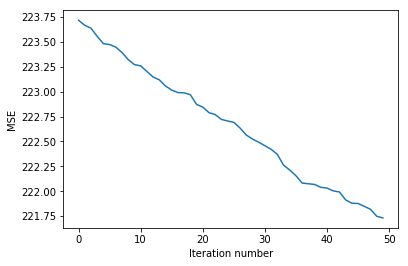

In [17]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
#print stoch_errors_by_iter
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


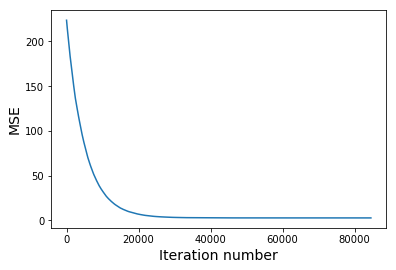

In [18]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number', fontsize =14)
ylabel('MSE',fontsize =14 )

**Посмотрим на вектор весов, к которому сошелся метод.**

In [19]:
stoch_grad_desc_weights

array([  1.40190566e+01,   3.91069256e+00,   2.78209808e+00,
        -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [23]:
print stoch_errors_by_iter[-1] #stoch_errors_by_iter[-1]

2.78441258835


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [21]:
answer4 = mserror (y[:,0], linear_prediction(X, stoch_grad_desc_weights))
# print stoch_errors_by_iter
#answer5 = np.min (stoch_errors_by_iter)
print answer4
# print answer5
write_answer_to_file(answer4, '4.txt')

2.78441258841


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**